Importação das bibliotecas necessárias:

In [170]:
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pandas as pd
import requests
import re

Web Scraping:


Utilizando as libs Requests e BeautifulSoup para obter acesso ao site desejado, e pegar o código HTML onde os dados que eu quero extrair estão inseridos.

In [171]:
url = 'https://www.nba.com/news/history-mvp-award-winners'

site = requests.get(url)

soup = BeautifulSoup(site.text, 'html.parser')

texto = soup.find_all('p')
    
conteudo = texto[4:72] # passando o slice para retirar coisas indesejadas que possam atrapalhar nas próximas etapas.

Extração dos dados desejados:


Utilizando de RegEx para encontrar os padrões da temporada onde os jogadores foram MVP's, seus nomes, e nome dos times em que eles jogavam nas respectivas temporadas.

In [172]:
lista_mvps, temporadas, times = [], [], []  # listas onde serão armazenados os dados.


padrao_nome_jogador = re.compile(r"[A-Z].*,") 
padrao_temporada = re.compile(r"[0-9]{4}-[0-9]{2}")  # criação dos padrões de RegEx.
padrao_times = re.compile(r"(?<=, ).*([A-Z]+|\d+)[a-z]+.*") 


for linha in conteudo:  # extração do conteudo desejado.
    nome_jogador = re.search(padrao_nome_jogador, linha.text)
    lista_mvps.append(nome_jogador.group()[:-1])  # o último caractere do texto era uma vírgula, e como ela foi utilizada para encontrar o padrão do nome dos jogadores, o slice foi passado para retirá-la, deixando apenas o conteúdo desejado.

    temporada = re.search(padrao_temporada, linha.text)
    temporadas.append(temporada.group())

    time = re.search(padrao_times, linha.text)
        
    if '(Voting)' in time.group(): # os nomes mais recentes presentes no site de onde o conteúdo foi extraído, possuíam um link para uma votação através do texto 'Voting', então esse if serve para retirá-lo sempre que necessário. 
        time = time.group().replace(' (Voting)', '')
        times.append(time)
    else:
        times.append(time.group())


Transformando em um DataFrame:

In [173]:
dados = {
    "Temporada": temporadas,
    "Jogador": lista_mvps,
    "Time": times
}

dados_df = pd.DataFrame(dados)
dados_df.head()


,Temporada,Jogador,Time
0,2022-23,Joel Embiid,Philadelphia 76ers
1,2021-22,Nikola Jokic,Denver Nuggets
2,2020-21,Nikola Jokic,Denver Nuggets
3,2019-20,Giannis Antetokounmpo,Milwaukee Bucks
4,2018-19,Giannis Antetokounmpo,Milwaukee Bucks


Apresentando graficamente:

Plotando o primeiro gráfico:

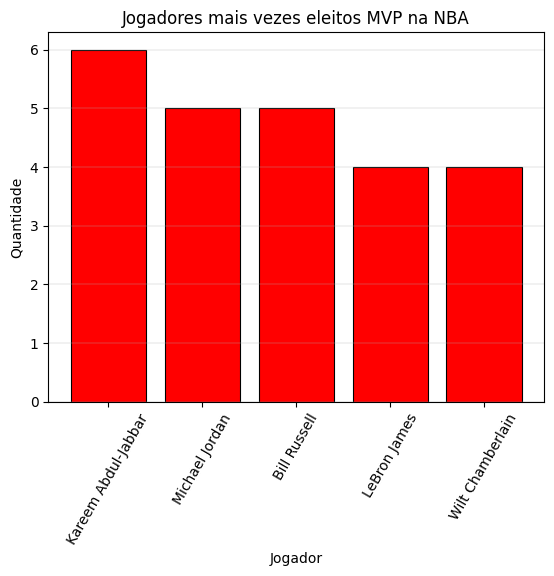

In [174]:
x = dados_df['Jogador'].value_counts().head().index  
y = dados_df['Jogador'].value_counts().head().values 


fig, ax = plt.subplots()   

ax.bar(x, y, width=0.8, edgecolor="black", linewidth=0.8, color='red')

ax.set_title('Jogadores mais vezes eleitos MVP na NBA')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Jogador') 

plt.xticks(rotation=60)
plt.grid(axis='y', linestyle='-', linewidth=0.25)

plt.show()

Plotando o segundo gráfico:

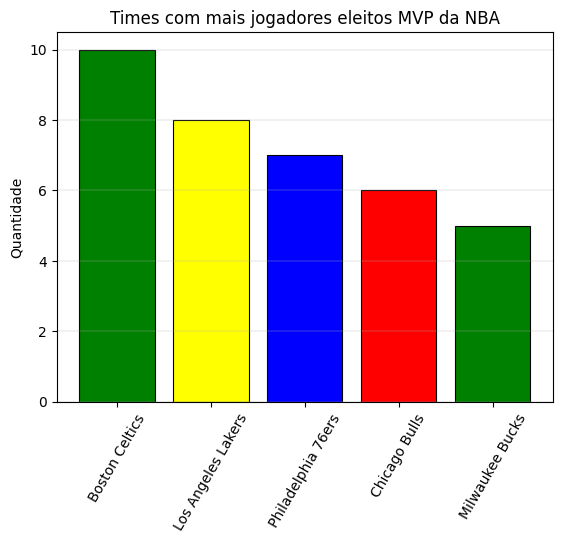

In [175]:
x = dados_df['Time'].value_counts().head().index
y = dados_df['Time'].value_counts().head().values 


cores = ['green', 'yellow', 'blue', 'red', 'green']

fig, ax = plt.subplots()

ax.bar(x, y, width=0.8, edgecolor="black", linewidth=0.8, color=cores)

ax.set_title('Times com mais jogadores eleitos MVP da NBA')
ax.set_ylabel('Quantidade')

plt.xticks(rotation=60)
plt.grid(axis='y', linestyle='-', linewidth=0.25)

plt.show()